# K-Nearest Neighbors (K-NN): Классификация


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

## 1. Загрузка датасета Iris

**Iris Dataset** - классический датасет для классификации цветов ириса на 3 вида:
- Setosa
- Versicolor
- Virginica

**Признаки:** длина и ширина чашелистика и лепестка


In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print(f"Размер данных: {df.shape}")
df.head(10) 

Размер данных: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
5,5.4,3.9,1.7,0.4,0,Setosa
6,4.6,3.4,1.4,0.3,0,Setosa
7,5.0,3.4,1.5,0.2,0,Setosa
8,4.4,2.9,1.4,0.2,0,Setosa
9,4.9,3.1,1.5,0.1,0,Setosa


In [3]:
print("Распределение классов:")
print(df['species_name'].value_counts())

Распределение классов:
species_name
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


## 2. Визуализация данных


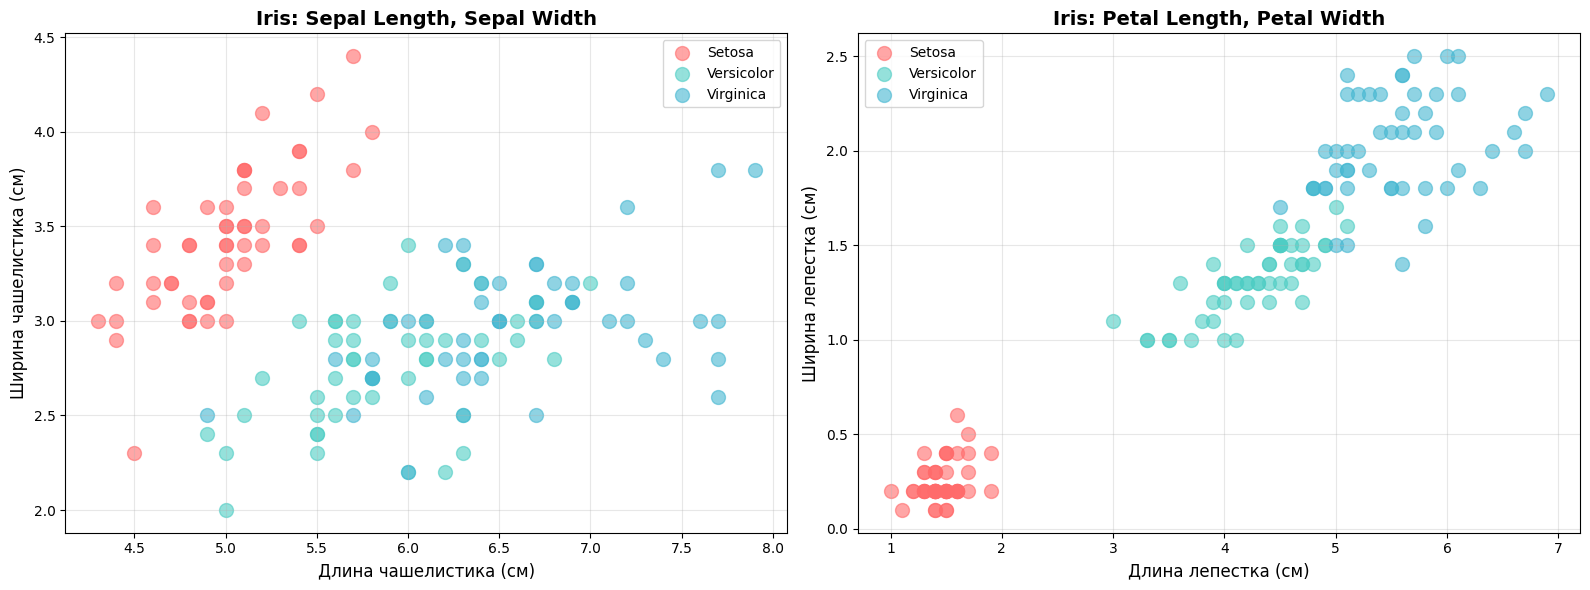

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = {'Setosa': '#FF6B6B', 'Versicolor': '#4ECDC4', 'Virginica': '#45B7D1'}

for species in df['species_name'].unique():
    species_data = df[df['species_name'] == species]
    axes[0].scatter(species_data['sepal length (cm)'], 
                   species_data['sepal width (cm)'],
                   label=species, s=100, alpha=0.6, color=colors[species])

axes[0].set_xlabel('Длина чашелистика (см)', fontsize=12)
axes[0].set_ylabel('Ширина чашелистика (см)', fontsize=12)
axes[0].set_title('Iris: Sepal Length, Sepal Width', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for species in df['species_name'].unique():
    species_data = df[df['species_name'] == species]
    axes[1].scatter(species_data['petal length (cm)'], 
                   species_data['petal width (cm)'],
                   label=species, s=100, alpha=0.6, color=colors[species])

axes[1].set_xlabel('Длина лепестка (см)', fontsize=12)
axes[1].set_ylabel('Ширина лепестка (см)', fontsize=12)
axes[1].set_title('Iris: Petal Length, Petal Width', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Подготовка данных

**Важно:** K-NN очень чувствителен к масштабу признаков!
Необходимо провести **стандартизацию** данных


In [5]:
X = df[iris.feature_names].values
y = df['species'].values

print("До масштабирования:")
print(pd.DataFrame(X, columns=iris.feature_names).describe().loc[['mean', 'std', 'min', 'max']])

До масштабирования:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean           5.843333          3.057333           3.758000          1.199333
std            0.828066          0.435866           1.765298          0.762238
min            4.300000          2.000000           1.000000          0.100000
max            7.900000          4.400000           6.900000          2.500000


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (105, 4)
Test: (45, 4)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nПосле масштабирования:")
print(pd.DataFrame(X_train_scaled, columns=iris.feature_names).describe().loc[['mean', 'std', 'min', 'max']].round(2))


После масштабирования:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean               0.00             -0.00              -0.00             -0.00
std                1.00              1.00               1.00              1.00
min               -1.83             -2.32              -1.51             -1.43
max                2.36              2.96               1.75              1.67


## 4. Обучение K-NN с K=3


In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность (K=3): {accuracy:.4f}")

Точность (K=3): 0.9111


In [10]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



## 5. Подбор оптимального K

Попробуем разные значения K и найдём оптимальное


In [11]:
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    
    train_pred = knn_temp.predict(X_train_scaled)
    test_pred = knn_temp.predict(X_test_scaled)
    
    train_scores.append(accuracy_score(y_train, train_pred))
    test_scores.append(accuracy_score(y_test, test_pred))

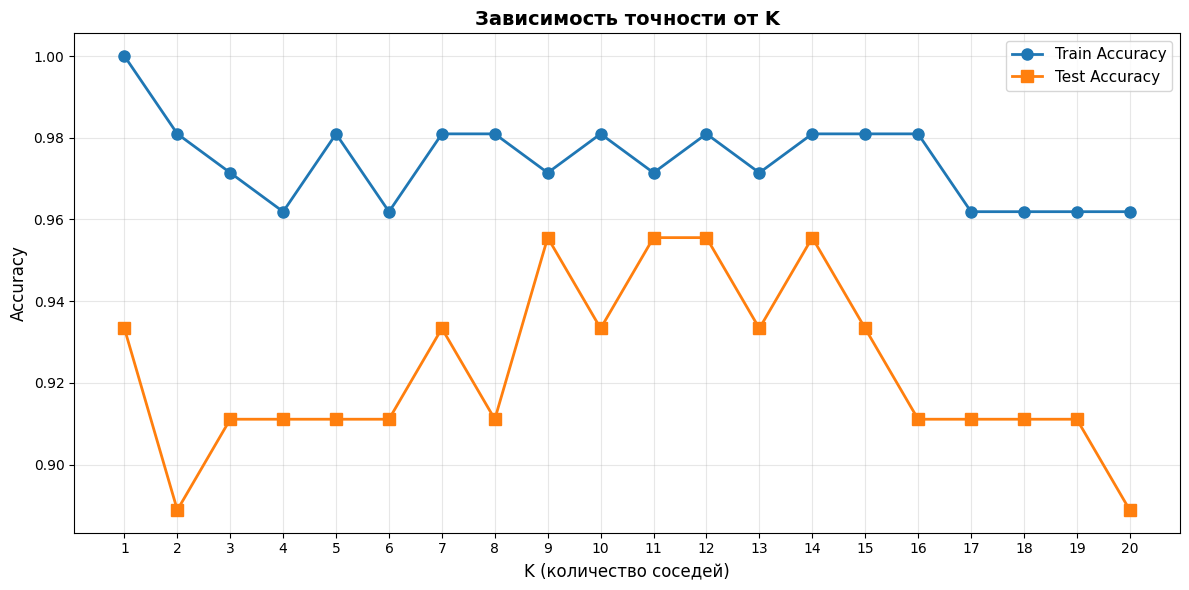

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores, 'o-', label='Train Accuracy', linewidth=2, markersize=8)
plt.plot(k_values, test_scores, 's-', label='Test Accuracy', linewidth=2, markersize=8)
plt.xlabel('K (количество соседей)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Зависимость точности от K', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

In [13]:
optimal_k = test_scores.index(max(test_scores)) + 1
print(f"\nОптимальный K: {optimal_k}")
print(f"Максимальная точность на Test: {max(test_scores):.4f}")


Оптимальный K: 9
Максимальная точность на Test: 0.9556


## 7. Финальная модель

In [14]:
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)

y_pred_final = knn_final.predict(X_test_scaled)

print(classification_report(y_test, y_pred_final, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 8. Пример предсказания для нового цветка


In [15]:
new_flower = np.array([[5.0, 3.5, 1.5, 0.3]])  

new_flower_scaled = scaler.transform(new_flower)

prediction = knn_final.predict(new_flower_scaled)
probabilities = knn_final.predict_proba(new_flower_scaled)

print("Новый цветок:")
print(f"  Sepal Length: {new_flower[0][0]} cm")
print(f"  Sepal Width: {new_flower[0][1]} cm")
print(f"  Petal Length: {new_flower[0][2]} cm")
print(f"  Petal Width: {new_flower[0][3]} cm")
print(f"\nПредсказание: {iris.target_names[prediction[0]]}")
print(f"\nВероятности:")
for i, prob in enumerate(probabilities[0]):
    print(f"  {iris.target_names[i]}: {prob:.4f} ({prob*100:.2f}%)")

Новый цветок:
  Sepal Length: 5.0 cm
  Sepal Width: 3.5 cm
  Petal Length: 1.5 cm
  Petal Width: 0.3 cm

Предсказание: setosa

Вероятности:
  setosa: 1.0000 (100.00%)
  versicolor: 0.0000 (0.00%)
  virginica: 0.0000 (0.00%)


## 8. K-NN на реальном датасете: Drug Classification

Применим K-NN для **медицинской задачи**: подбор лекарства для пациента на основе его характеристик

**Задача:** По возрасту, полу, давлению, холестерину и соотношению Na/K предсказать тип лекарства

In [16]:
df_drug = pd.read_csv('datasets/drug200.csv')

print(f"Размер данных: {df_drug.shape}")
df_drug.head(10)

Размер данных: (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [17]:
print("Информация о датасете:")
df_drug.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [18]:
print("Пропущенные значения:")
print(df_drug.isnull().sum().sum())

print(f"Холестерин: {df_drug['Cholesterol'].unique()}")

print(df_drug['Drug'].value_counts())

print(f"Давление: {df_drug['BP'].unique()}")

print(f"Пол: {df_drug['Sex'].unique()}")

Пропущенные значения:
0
Холестерин: ['HIGH' 'NORMAL']
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
Давление: ['HIGH' 'LOW' 'NORMAL']
Пол: ['F' 'M']


### Подготовка данных Drug

In [19]:
df_clean = df_drug.copy()

from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()
le_drug = LabelEncoder()

df_clean['Sex_Encoded'] = le_sex.fit_transform(df_clean['Sex'])
df_clean['BP_Encoded'] = le_bp.fit_transform(df_clean['BP'])

df_clean['Cholesterol_Encoded'] = le_chol.fit_transform(df_clean['Cholesterol'])
df_clean.head()

df_clean['Drug_Encoded'] = le_drug.fit_transform(df_clean['Drug'])

print(df_clean['Drug_Encoded'].value_counts().sort_index())

Drug_Encoded
0    91
1    23
2    16
3    16
4    54
Name: count, dtype: int64


In [20]:
features_drug = ['Age', 'Sex_Encoded', 'BP_Encoded', 'Cholesterol_Encoded', 'Na_to_K']
target = 'Drug_Encoded'

X_drug = df_clean[features_drug].values
y_drug = df_clean[target].values

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_drug, y_drug, test_size=0.2, random_state=42, stratify=y_drug
)

scaler_drug = StandardScaler()

X_train_d_scaled = scaler_drug.fit_transform(X_train_d)
print(f"Test: {X_test_d.shape}")

X_test_d_scaled = scaler_drug.transform(X_test_d)
print(f"Train: {X_train_d.shape}")


Test: (40, 5)
Train: (160, 5)


In [21]:
k_values_drug = range(1, 31)
train_scores_drug = []
test_scores_drug = []

for k in k_values_drug:
    knn_d = KNeighborsClassifier(n_neighbors=k)
    knn_d.fit(X_train_d_scaled, y_train_d)
    
    train_scores_drug.append(knn_d.score(X_train_d_scaled, y_train_d))
    test_scores_drug.append(knn_d.score(X_test_d_scaled, y_test_d))

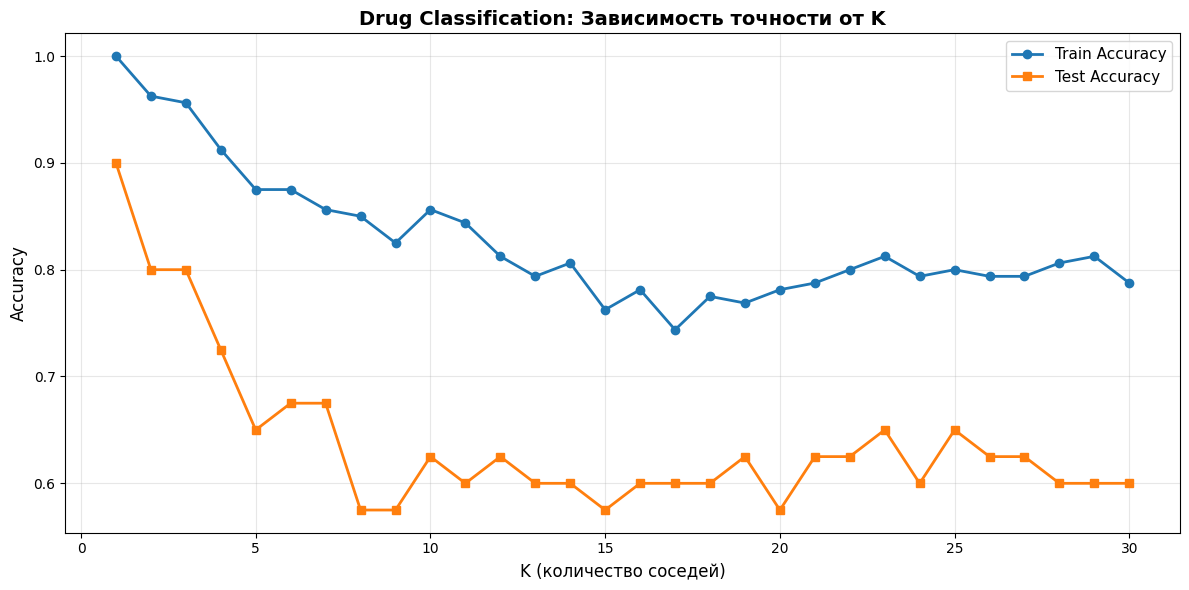

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(k_values_drug, train_scores_drug, 'o-', label='Train Accuracy', linewidth=2, markersize=6)
plt.plot(k_values_drug, test_scores_drug, 's-', label='Test Accuracy', linewidth=2, markersize=6)
plt.xlabel('K (количество соседей)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Drug Classification: Зависимость точности от K', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [23]:
optimal_k_drug = 3 

print(f"Train accuracy: {train_scores_drug[optimal_k_drug-1]:.4f}")
print(f"Test accuracy: {test_scores_drug[optimal_k_drug-1]:.4f}")

Train accuracy: 0.9563
Test accuracy: 0.8000


In [24]:
knn_drug_final = KNeighborsClassifier(n_neighbors=optimal_k_drug)
knn_drug_final.fit(X_train_d_scaled, y_train_d)

y_pred_drug = knn_drug_final.predict(X_test_d_scaled)

print(classification_report(y_test_d, y_pred_drug, target_names=le_drug.classes_))

              precision    recall  f1-score   support

       DrugY       0.86      0.67      0.75        18
       drugA       1.00      0.60      0.75         5
       drugB       1.00      1.00      1.00         3
       drugC       0.75      1.00      0.86         3
       drugX       0.69      1.00      0.81        11

    accuracy                           0.80        40
   macro avg       0.86      0.85      0.83        40
weighted avg       0.83      0.80      0.79        40



### Пример предсказания для нового пациента

In [27]:
# Новый пациент: 35 лет, женщина, ВЫСОКОЕ давление, ВЫСОКИЙ холестерин, Na_to_K = 15.5
# [Age, Sex_Encoded, BP_Encoded, Cholesterol_Encoded, Na_to_K]
# Sex: F=0, M=1 | BP: HIGH=0, LOW=1, NORMAL=2 | Cholesterol: HIGH=0, NORMAL=1
new_patient = np.array([[35, 1, 0, 1, 15.5]])  

new_patient_scaled = scaler_drug.transform(new_patient)

prediction_drug = knn_drug_final.predict(new_patient_scaled)
probabilities_drug = knn_drug_final.predict_proba(new_patient_scaled)

print("Новый пациент:")
print(f"  Возраст: {int(new_patient[0][0])} лет")
print(f"  Пол: {'Женщина' if new_patient[0][1] == 0 else 'Мужчина'}")
print(f"  Давление: {le_bp.inverse_transform([int(new_patient[0][2])])[0]}")
print(f"  Холестерин: {le_chol.inverse_transform([int(new_patient[0][3])])[0]}")
print(f"  Na/K соотношение: {new_patient[0][4]:.2f}")
print(f"\nРекомендованное лекарство: {le_drug.inverse_transform([prediction_drug[0]])[0]}")
print(f"\nВероятности для каждого типа лекарства:")

for i, drug_name in enumerate(le_drug.classes_):    print(f"  {drug_name}: {probabilities_drug[0][i]:.4f} ({probabilities_drug[0][i]*100:.2f}%)")

Новый пациент:
  Возраст: 35 лет
  Пол: Мужчина
  Давление: HIGH
  Холестерин: NORMAL
  Na/K соотношение: 15.50

Рекомендованное лекарство: DrugY

Вероятности для каждого типа лекарства:
  DrugY: 0.6667 (66.67%)
  drugA: 0.3333 (33.33%)
  drugB: 0.0000 (0.00%)
  drugC: 0.0000 (0.00%)
  drugX: 0.0000 (0.00%)


---

## Домашнее задание
Примените K-NN к одному из ваших датасетов